In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import learning_curve, cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline

Firstly, we create the data and scale them.


In [2]:
np.random.seed(42)
m = 1000
X = 5 * np.random.rand(m, 1) - 2.5
y = np.sin(X)*100 + np.random.randn(m, 1)

In [3]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [4]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_sc, y, train_sizes = np.linspace(0.01, 1.0, 40),
    scoring = "neg_root_mean_squared_error")

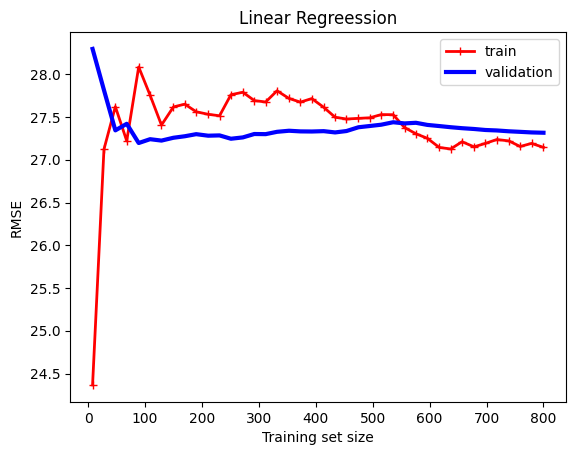

In [5]:
train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="validation")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.title("Linear Regreession")
plt.show()

The linear model's performance stabilizes after approximately training set size = 600 and then it generalizes better.

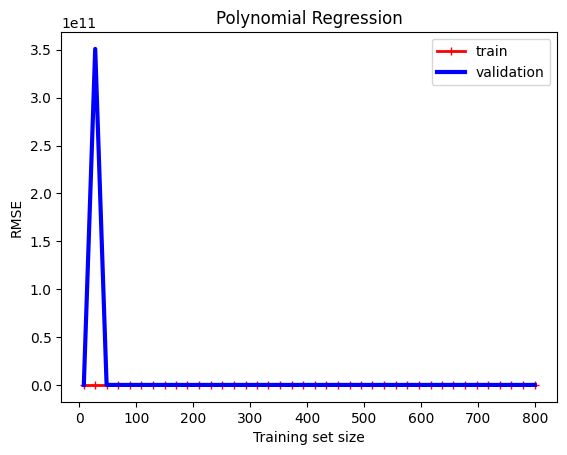

In [6]:
polynomial_regression = make_pipeline(PolynomialFeatures(degree=50), StandardScaler(), LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X_sc, y, train_sizes=np.linspace(0.01, 1.0, 40),
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="validation")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.title("Polynomial Regression")
plt.show()

The polynomial model is overfitting the data because the training error is small while the validation error is large.
In order to get a better picture for what happens after training set size = 100, we use the following code to zoom in the area 100 < training set size < 600.

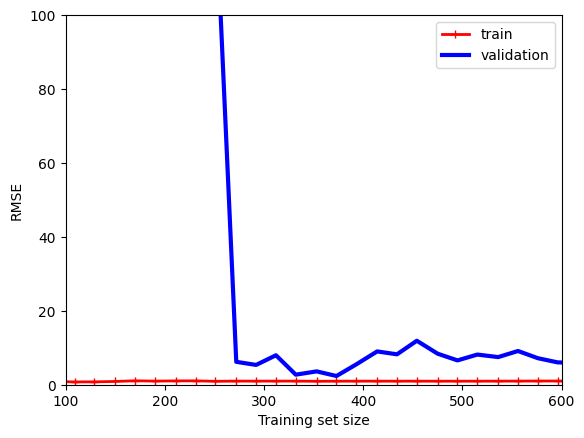

In [7]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="validation")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.xlim(100, 600)
plt.ylim(0, 100)
plt.show()

We can see that the model still overfits and the validation error is way larger than the training error.
Finally we zoom in the area 700 < training set size < 800

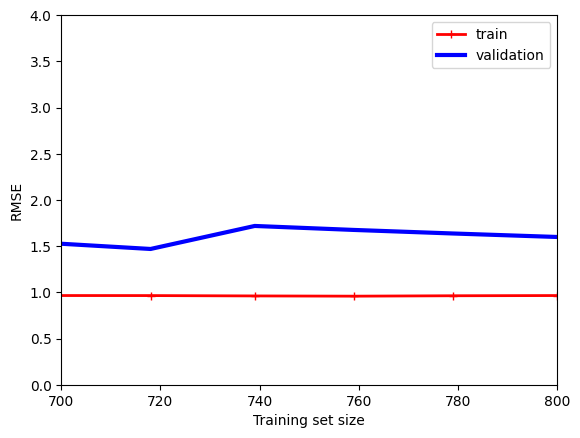

In [8]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="validation")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.xlim(700, 800)
plt.ylim(0, 4)
plt.show()

We can see that the errors after training set size = 750 are very small and close to each other. This means that the model might stop overfitting for a training size larger than 750, but we need to test it in unseen data to make sure it generalizes well.

In [14]:
train_sizes, train_scores, valid_scores = learning_curve(
    Ridge(alpha=0.001), X_sc, y, train_sizes = np.linspace(0.01, 1.0, 40),
    scoring = "neg_root_mean_squared_error")



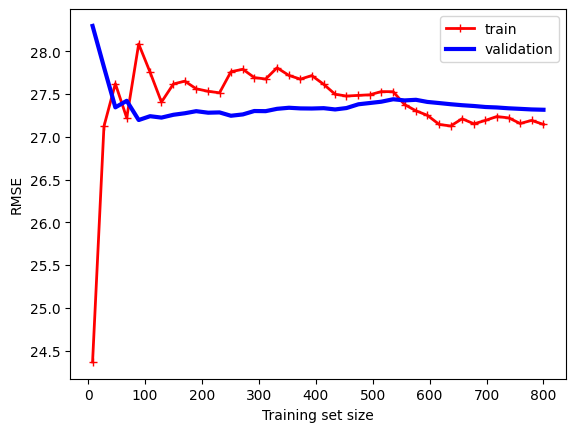

In [15]:
train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="validation")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.show()

The Ridge Regression model is very close to the Linear Regression Model.

We can see that the Ridge Regression and the Linear Regression models are almost identical while the Polynomial Regression overfits the data.

In [16]:
lin_reg = LinearRegression()
reg_rmses = cross_val_score(lin_reg, X_sc, y, cv=10)

In [17]:
mean_score = round(np.mean(reg_rmses), 4)
std_score = round(np.std(reg_rmses), 4)
print("mean: ",mean_score, "standard deviation: ", std_score)

mean:  0.8736 standard deviation:  0.0124


In [18]:
poly_rmses = cross_val_score(polynomial_regression, X_sc, y, cv=10)

In [19]:
mean_score = round(np.mean(poly_rmses), 4)
std_score = round(np.std(poly_rmses), 4)
print("mean: ",mean_score, "standard deviation: ", std_score)

mean:  0.9994 standard deviation:  0.0012


In [20]:
rid_reg = Ridge(alpha = 0.001)
reg_rmses = cross_val_score(rid_reg, X_sc, y, cv=10)

In [21]:
mean_score = round(np.mean(reg_rmses), 4)
std_score = round(np.std(reg_rmses), 4)
print("mean: ",mean_score, "standard deviation: ", std_score)

mean:  0.8736 standard deviation:  0.0124


The linear regression model and the ridge model, have almost identical RMSE, while the polynomial model has a larger mean RMSE which shows that it performs worse. The polynomial model has smaller standard deviation which is probably due to overfitting.